## 25 April 2025
## Mr. Hanan Ahmad Power BI project
## Presented by Muhammad Awais Afzal

In [14]:
# importing necesary libraries
import pandas as pd
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="openpyxl")
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import ExcelWriter
import os

### Setting up the Foundation

In [7]:
# Checking the File structure
pd.read_excel('Cotton 22-23.xlsx').head()

,"SELLER: HAJI ABDUL SALAM TAREN COTTON PROCESS CO. LTD., BANUR ANDAM, KANDAHAR, AFGHANISTAN AND BUYER: M/s MEHRAN COMMODITIES > M/s BAZAAR TECHNOLOGIES, 47-E 21st COMMERCIAL STREET PHASE 2 EXT. DHA KARACHI",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 92,Unnamed: 93,Unnamed: 94,Unnamed: 95,Unnamed: 96,Unnamed: 97,Unnamed: 98,Unnamed: 99,Unnamed: 100,Unnamed: 101
0,COMMERCIAL INVOICE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,S/No.,Date,Importer,Order\nAfgh Load\n(Commercial Invoice)\nDelivered,NaN,Purchase Rate,Order \n Trucks \nController,Contract \nRef:,Commercial \nInvoice,Status of Trucks\nReach,...,GST paid On import 17%,Additional GST On Import 3%,Total GST On Import,Income Tax Import 1.2%,Total Tax Excl. Local Tax,Total Landed Value of Import,PSID Referrence .,CESS TAX \nLocal Body Tax,PSID Amount / Cheque Amount,Remarks GD/PSID
2,1,2,3,4,5,NaN,6,7,8,9,...,81,82,83,84,85,86,86,87,89,90
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,2022-08-23 00:00:00,M/s INDUS DYEING (MEH-BAZ-IND220001),*Order*,20000,NaN,1,MEH-BAZ-IND220001,MEH-BAZ-IND220001-01,Accepted,...,1733945.43,305990.37,2039935.8,122396.148,2162331.948,10316986,NaN,NaN,NaN,NaN


In [8]:
# Checking the Sheet names
xls = pd.ExcelFile("Cotton 22-23.xlsx")
sheet_list = xls.sheet_names
print(sheet_list)

['MEH', 'STML230002', 'SUMMERY MEHRAN', 'SUMMERY', 'Master Vs Mehran', 'ZMN', 'SALAM', 'useless', 'SUMMERY SALAM', 'Balance Orders', 'ZMN 01+01', 'Conversions']


### Data Cleaning

In [9]:
# checking the first few rows of each file sheet
for sheet in sheet_list:
    df = xls.parse(sheet)
    print(f"Sheet: {sheet}")
    print(df.head())

Sheet: MEH
  SELLER: HAJI ABDUL SALAM TAREN COTTON PROCESS CO. LTD., BANUR ANDAM, KANDAHAR, AFGHANISTAN AND BUYER: M/s MEHRAN COMMODITIES > M/s BAZAAR TECHNOLOGIES,  47-E 21st COMMERCIAL STREET PHASE 2 EXT. DHA KARACHI  \
0                                 COMMERCIAL INVOICE                                                                                                                                                              
1                                              S/No.                                                                                                                                                              
2                                                  1                                                                                                                                                              
3                                                NaN                                                                                             

In [12]:
# Cleaning the Data
output_folder = "Cleaned_Files"
os.makedirs(output_folder, exist_ok=True)

# Group data by original file
file_grouped_data = {}

for key, df in all_data.items():
    file_name, sheet_name = key.split("_", 1)
    file_grouped_data.setdefault(file_name, {})[sheet_name] = df

# Write cleaned sheets to new Excel files
for file_name, sheets in file_grouped_data.items():
    output_path = os.path.join(output_folder, f"{file_name}_CLEANED.xlsx")
    with ExcelWriter(output_path, engine='openpyxl') as writer:
        for sheet_name, df in sheets.items():
            safe_sheet_name = sheet_name[:31]  # Excel sheet name limit
            df.to_excel(writer, sheet_name=safe_sheet_name, index=False)
    print(f"✅ Cleaned file saved: {output_path}")

✅ Cleaned file saved: Cleaned_Files/Cotton 22-23.xlsx
✅ Cleaned file saved: Cleaned_Files/onyx.xlsx
✅ Cleaned file saved: Cleaned_Files/lead Gds.xlsx


In [13]:
# File paths (update these paths to your local machine)
onyx_path = "Onyx.xlsx"
lead_path = "Lead GDs.xlsx"
cotton_path = "Cotton 22-23.xlsx"

# Function to print sheets and their columns
def print_sheets_and_columns(file_path, file_name):
    print(f"\n===== {file_name} =====")
    xls = pd.ExcelFile(file_path)
    sheets = xls.sheet_names
    print(f"Sheets: {sheets}")

    for sheet in sheets:
        try:
            df = pd.read_excel(file_path, sheet_name=sheet, nrows=1)  # Read only first row for speed
            columns = df.columns.tolist()
            print(f"\nSheet: {sheet}")
            print(f"Columns: {columns}")
        except Exception as e:
            print(f"\nSheet: {sheet} -- Could not read due to error: {e}")

# Run for all three files
print_sheets_and_columns(onyx_path, "Onyx.xlsx")
print_sheets_and_columns(lead_path, "Lead GDs.xlsx")
print_sheets_and_columns(cotton_path, "Cotton File.xlsx")


===== Onyx.xlsx =====
Sheets: ['Old Marmi Exports', 'Import', 'Export', 'Final Export', 'Summary', 'May to end sum', 'Shipping Bills', 'Supplier Ledgers', 'BLs', 'GM', 'LM', 'Saeed LM', 'Ornagram']

Sheet: Old Marmi Exports
Columns: ['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29', 'Unnamed: 30']

Sheet: Import
Columns: ['Import Details', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Received at Site ', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 

## 1st KPI Total_Revenue.xlsx Creation

In [22]:
# 1. Load the Export sheet, using row index 1 as header
export_df = pd.read_excel("Onyx.xlsx", sheet_name="Export", header=1, dtype=str)

# 2. Clean column names (remove newlines and extra spaces)
export_df.columns = (
    export_df.columns
    .str.strip()
    .str.replace('\n', ' ', regex=False)
    .str.replace('  ', ' ', regex=False)
)

# 3. Rename necessary columns
export_df = export_df.rename(columns={
    "Document No./Ref": "Invoice_No",
    "Invoice Date":     "Invoice_Date",
    "Block Code/Marking": "Product_Name",
    "Blocks Qty":       "Quantity",
    "Total USD":        "Amount_USD"
})

# 4. Filter to keep only rows with a valid invoice number
export_df = export_df[export_df["Invoice_No"].notna()]

# 5. Convert proper columns to correct types safely
export_df["Invoice_Date"] = pd.to_datetime(export_df["Invoice_Date"], errors="coerce")
export_df["Quantity"] = pd.to_numeric(export_df["Quantity"], errors="coerce")
export_df["Amount_USD"] = pd.to_numeric(export_df["Amount_USD"], errors="coerce")

# 6. Derive Year/Month/Quarter
export_df["Year"]    = export_df["Invoice_Date"].dt.year
export_df["Month"]   = export_df["Invoice_Date"].dt.to_period("M")
export_df["Quarter"] = export_df["Invoice_Date"].dt.to_period("Q")

# 7. Select final columns
revenue_df = export_df[[
    "Invoice_No", "Invoice_Date", "Product_Name",
    "Quantity", "Amount_USD", "Year", "Month", "Quarter"
]]

# 8. Write to Excel cleanly
output_file = "Total_Revenue.xlsx"
revenue_df.to_excel(output_file, index=False)

print(f"→ '{output_file}' has been created successfully.")
revenue_df

→ 'Total_Revenue.xlsx' has been created successfully.


,Invoice_No,Invoice_Date,Product_Name,Quantity,Amount_USD,Year,Month,Quarter
28,MC-AN-X-01,2023-03-21,AN Onyx,39.0,7077.00,2023.0,2023-03,2023Q1
29,MC-AN-X-01,2023-03-21,AN Onyx,17.0,7719.00,2023.0,2023-03,2023Q1
30,MC-AN-X-01,2023-03-21,AN Onyx,48.0,8104.50,2023.0,2023-03,2023Q1
31,MC-AN-X-01,2023-03-21,AN Onyx,30.0,8502.00,2023.0,2023-03,2023Q1
32,MC-AN-X-01,2023-03-21,AN Onyx,38.0,8320.50,2023.0,2023-03,2023Q1
...,...,...,...,...,...,...,...,...
142,DTRE5018It,2023-10-02,LM Onyx 2,8.0,5381.25,2023.0,2023-10,2023Q4
143,DTRE5018It,2023-10-02,LM Onyx 2,9.0,5421.15,2023.0,2023-10,2023Q4
144,MEH1001iT,2023-10-02,LM Onyx 2,15.0,5526.15,2023.0,2023-10,2023Q4
145,MEH1001iT,2023-10-02,LM Onyx 2,8.0,4902.45,2023.0,2023-10,2023Q4


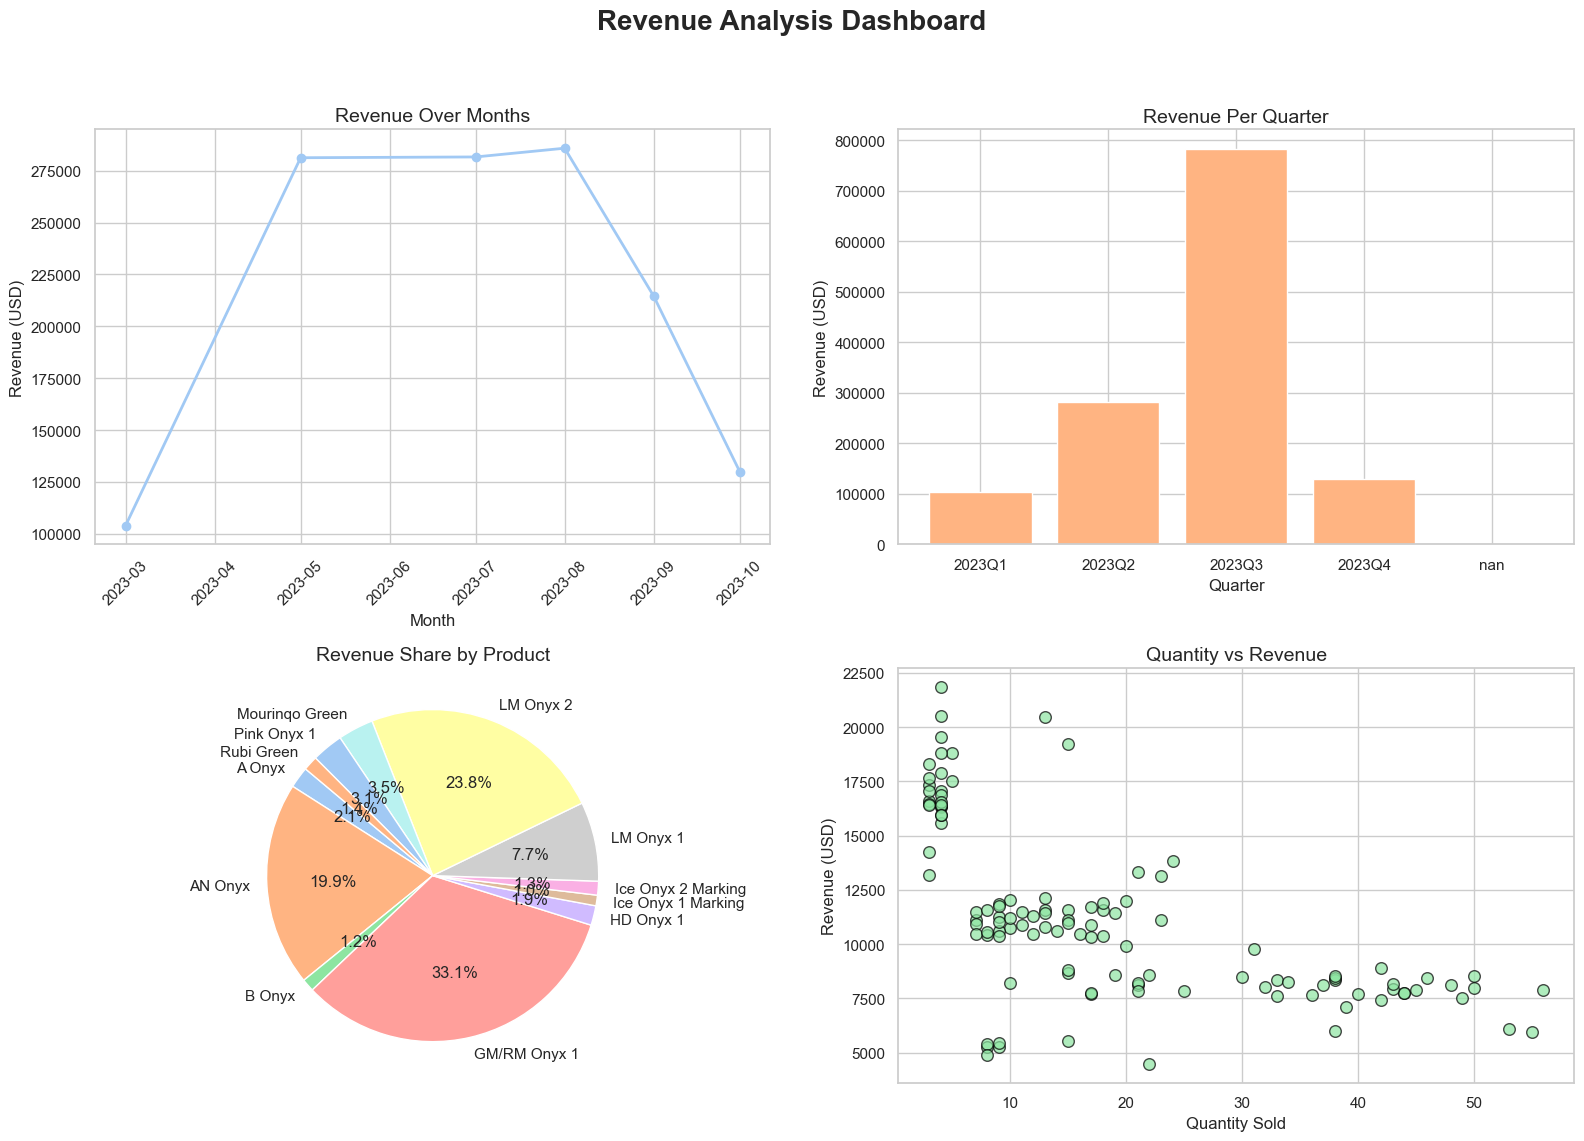

✅ Plot saved successfully as 'Revenue_Dashboard.png'


In [23]:
# 1. Load the cleaned revenue data
df = pd.read_excel("Total_Revenue.xlsx")

# 2. Convert 'Month' and 'Quarter' properly
df['Month'] = pd.to_datetime(df['Month'].astype(str))
df['Quarter'] = df['Quarter'].astype(str)

# 3. Set a consistent aesthetic
sns.set_theme(style="whitegrid")  # modern nice style
palette = sns.color_palette("pastel")

# 4. Create figure grid
fig, axs = plt.subplots(2, 2, figsize=(16, 12))  # 2 rows x 2 columns grid
fig.suptitle('Revenue Analysis Dashboard', fontsize=20, fontweight='bold')

# Plot 1: Line plot - Revenue over Months
monthly_revenue = df.groupby('Month')['Amount_USD'].sum()
axs[0, 0].plot(monthly_revenue.index, monthly_revenue.values, marker='o', color=palette[0], linewidth=2)
axs[0, 0].set_title('Revenue Over Months', fontsize=14)
axs[0, 0].set_xlabel('Month')
axs[0, 0].set_ylabel('Revenue (USD)')
axs[0, 0].tick_params(axis='x', rotation=45)

# Plot 2: Bar plot - Revenue per Quarter
quarterly_revenue = df.groupby('Quarter')['Amount_USD'].sum()
axs[0, 1].bar(quarterly_revenue.index, quarterly_revenue.values, color=palette[1])
axs[0, 1].set_title('Revenue Per Quarter', fontsize=14)
axs[0, 1].set_xlabel('Quarter')
axs[0, 1].set_ylabel('Revenue (USD)')

# Plot 3: Pie chart - Revenue by Product
product_revenue = df.groupby('Product_Name')['Amount_USD'].sum()
axs[1, 0].pie(product_revenue, labels=product_revenue.index, autopct='%1.1f%%',
              startangle=140, colors=palette, wedgeprops={'edgecolor': 'white'})
axs[1, 0].set_title('Revenue Share by Product', fontsize=14)

# Plot 4: Scatter plot - Quantity vs Amount
axs[1, 1].scatter(df['Quantity'], df['Amount_USD'], color=palette[2], edgecolors='black', s=70, alpha=0.7)
axs[1, 1].set_title('Quantity vs Revenue', fontsize=14)
axs[1, 1].set_xlabel('Quantity Sold')
axs[1, 1].set_ylabel('Revenue (USD)')

# Tight layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# ✅ Save the figure
plt.savefig("Revenue_Dashboard.png", dpi=300)  # You can also save as .pdf, .svg, etc.

# Show the plots
plt.show()

print("✅ Plot saved successfully as 'Revenue_Dashboard.png'")

## 2nd KPI Merged_Daily_Cost.xlsx Creation

In [24]:
# Step 1: Load the Lead GDs file properly
lead_file = "Lead GDs.xlsx"
lead_gds_df = pd.read_excel(lead_file, sheet_name="Lead GDs", header=2)

# Step 2: Clean and select the useful columns
lead_gds_df = lead_gds_df.rename(columns={
    "Date of IGM": "Cost_Date",
    "Net \nImport Weight": "Quantity",
    "Import Amount": "Cost_Amount"
})

# Step 3: Keep only necessary columns
lead_gds_cleaned = lead_gds_df[["Cost_Date", "Quantity", "Cost_Amount"]].copy()

# Step 4: Drop rows where all important columns are missing
lead_gds_cleaned = lead_gds_cleaned.dropna(subset=["Cost_Date", "Cost_Amount"])

# Step 5: (Optional) Make sure data types are correct
lead_gds_cleaned["Cost_Date"] = pd.to_datetime(lead_gds_cleaned["Cost_Date"], errors='coerce')
lead_gds_cleaned["Quantity"] = pd.to_numeric(lead_gds_cleaned["Quantity"], errors='coerce')
lead_gds_cleaned["Cost_Amount"] = pd.to_numeric(lead_gds_cleaned["Cost_Amount"], errors='coerce')

lead_gds_cleaned

,Cost_Date,Quantity,Cost_Amount
2,2024-09-12,84.13,4788813.0
3,NaT,88.24,5023660.0
4,2024-09-04,112.38,6397994.0
5,2024-09-02,52.18,2971233.0
6,2024-08-27,110.68,6297822.0
7,2024-08-23,109.78,6247731.0
8,2024-08-17,63.09,3592470.0
9,2024-07-06,122.05,6944789.0
10,2024-06-26,282.43,16076362.0
11,2024-06-26,281.63,16030825.0


In [25]:
# Step 1: Load the Lead GDs file properly
lead_file = "Lead GDs.xlsx"
lead_gds_df = pd.read_excel(lead_file, sheet_name="Lead GDs", header=2)

# Step 2: Clean and rename columns
lead_gds_df = lead_gds_df.rename(columns={
    "Date of IGM": "Cost_Date",
    "Net \nImport Weight": "Quantity",
    "Rate Ton": "Rate_Ton",
    "Gross \nImport Weight": "Gross_Weight",
    "Import Amount": "Cost_Amount",
    "Sale Rate in USD": "Sale_Rate_USD",
    "Sale": "Sale_Amount"
})

# Step 3: Select the columns you want to keep
lead_gds_cleaned = lead_gds_df[
    ["Cost_Date", "Quantity", "Rate_Ton", "Gross_Weight", "Cost_Amount", "Sale_Rate_USD", "Sale_Amount"]
].copy()

# Step 4: Drop rows where Cost_Date and Cost_Amount are missing
lead_gds_cleaned = lead_gds_cleaned.dropna(subset=["Cost_Amount"])

# Step 5: Correct datatypes
lead_gds_cleaned["Cost_Date"] = pd.to_datetime(lead_gds_cleaned["Cost_Date"], errors='coerce')
lead_gds_cleaned["Quantity"] = pd.to_numeric(lead_gds_cleaned["Quantity"], errors='coerce')
lead_gds_cleaned["Rate_Ton"] = pd.to_numeric(lead_gds_cleaned["Rate_Ton"], errors='coerce')
lead_gds_cleaned["Gross_Weight"] = pd.to_numeric(lead_gds_cleaned["Gross_Weight"], errors='coerce')
lead_gds_cleaned["Cost_Amount"] = pd.to_numeric(lead_gds_cleaned["Cost_Amount"], errors='coerce')
lead_gds_cleaned["Sale_Rate_USD"] = pd.to_numeric(lead_gds_cleaned["Sale_Rate_USD"], errors='coerce')
lead_gds_cleaned["Sale_Amount"] = pd.to_numeric(lead_gds_cleaned["Sale_Amount"], errors='coerce')

lead_gds_cleaned

,Cost_Date,Quantity,Rate_Ton,Gross_Weight,Cost_Amount,Sale_Rate_USD,Sale_Amount
0,NaT,8963.23,62946.974003,9173.23,547712861.0,NaN,NaN
2,2024-09-12,84.13,56921.585641,84.13,4788813.0,650.0,54684.5
3,NaT,88.24,56931.776972,88.24,5023660.0,650.0,57356.0
4,2024-09-04,112.38,56931.785015,112.38,6397994.0,650.0,73047.0
5,2024-09-02,52.18,56941.989268,52.18,2971233.0,650.0,33917.0
6,2024-08-27,110.68,56901.174557,110.68,6297822.0,650.0,71942.0
7,2024-08-23,109.78,56911.377300,109.78,6247731.0,650.0,71357.0
8,2024-08-17,63.09,56941.987637,63.09,3592470.0,650.0,41008.5
9,2024-07-06,122.05,56901.179844,122.05,6944789.0,650.0,79332.5
10,2024-06-26,282.43,56921.580569,282.43,16076362.0,650.0,183579.5


In [26]:
# 1) Load & clean
imp = pd.read_excel("Onyx.xlsx", sheet_name="Import", header=1)
imp.columns = (imp.columns.str.strip()
                      .str.replace("\n"," ")
                      .str.replace("  "," "))

# 2) Parse date
imp["Cost_Date"] = pd.to_datetime(imp["Receiving Date"], errors="coerce")

# 3) Pick cost cols
cost_cols = [
    "Ali Nawaz Charban Costs",
    "Chaman Clearing Costs - Qasim",
    "Pakistan Unloading Cost",
    "Weight Slip Expenses",
    "Route Expenses",
    # add more if you need...
]
# keep only existing ones
cost_cols = [c for c in cost_cols if c in imp.columns]

# 4) Coerce & sum
imp[cost_cols] = imp[cost_cols].apply(pd.to_numeric, errors="coerce").fillna(0)
imp["Cost_Amount"] = imp[cost_cols].sum(axis=1)

# 5) Daily aggregation
daily_cost = (
    imp.groupby("Cost_Date", as_index=False)["Cost_Amount"]
       .sum()
       .sort_values("Cost_Date")
)

daily_cost

,Cost_Date,Cost_Amount
0,2023-02-21,0.0
1,2023-02-24,0.0
2,2023-02-25,0.0
3,2023-02-28,0.0
4,2023-03-07,0.0
5,2023-04-01,0.0
6,2023-04-08,8000.0
7,2023-04-10,40000.0
8,2023-04-11,0.0
9,2023-04-14,0.0


In [27]:
# === Step 1: Load and prepare Lead GDs daily cost ===
lead_gds = pd.read_excel("Lead GDs.xlsx", sheet_name="Lead GDs", header=2)
lead_gds.columns = lead_gds.columns.str.strip().str.replace('\n', ' ')
lead_gds['Cost_Date'] = pd.to_datetime(lead_gds['Date of IGM'], errors='coerce')
lead_gds['Cost_Amount_Lead'] = pd.to_numeric(lead_gds['Import Amount'], errors='coerce').fillna(0)
lead_daily = lead_gds.groupby('Cost_Date', as_index=False)['Cost_Amount_Lead'].sum()

# === Step 2: Load and prepare Onyx Import daily cost ===
imp = pd.read_excel("Onyx.xlsx", sheet_name="Import", header=1)
imp.columns = imp.columns.str.strip().str.replace('\n', ' ')
imp['Cost_Date'] = pd.to_datetime(imp['Receiving Date'], errors='coerce')
cost_cols = [
    "Ali Nawaz Charban Costs",
    "Chaman Clearing Costs - Qasim",
    "Pakistan Unloading Cost",
    "Weight Slip Expenses",
    "Route Expenses"
]
cost_cols = [c for c in cost_cols if c in imp.columns]
imp[cost_cols] = imp[cost_cols].apply(pd.to_numeric, errors='coerce').fillna(0)
imp['Cost_Amount_Import'] = imp[cost_cols].sum(axis=1)
imp_daily = imp.groupby('Cost_Date', as_index=False)['Cost_Amount_Import'].sum()

# === Step 3: Merge the two daily cost series ===
merged = pd.merge(lead_daily, imp_daily, on='Cost_Date', how='outer').fillna(0)
merged['Total_Cost_Amount'] = merged['Cost_Amount_Lead'] + merged['Cost_Amount_Import']
merged = merged.sort_values('Cost_Date')

# === Step 4: Export to Excel ===
output_file = "Merged_Daily_Cost.xlsx"
merged.to_excel(output_file, index=False)

print(f"✅ Merged daily cost file created: {output_file}")
merged

✅ Merged daily cost file created: Merged_Daily_Cost.xlsx


,Cost_Date,Cost_Amount_Lead,Cost_Amount_Import,Total_Cost_Amount
0,2023-02-21,0.0,0.0,0.0
1,2023-02-24,0.0,0.0,0.0
2,2023-02-25,0.0,0.0,0.0
3,2023-02-28,0.0,0.0,0.0
4,2023-03-07,0.0,0.0,0.0
5,2023-04-01,0.0,0.0,0.0
6,2023-04-08,0.0,8000.0,8000.0
7,2023-04-10,0.0,40000.0,40000.0
8,2023-04-11,0.0,0.0,0.0
9,2023-04-14,0.0,0.0,0.0


✅ Plot saved as 'Daily_Cost_Plots.png'.


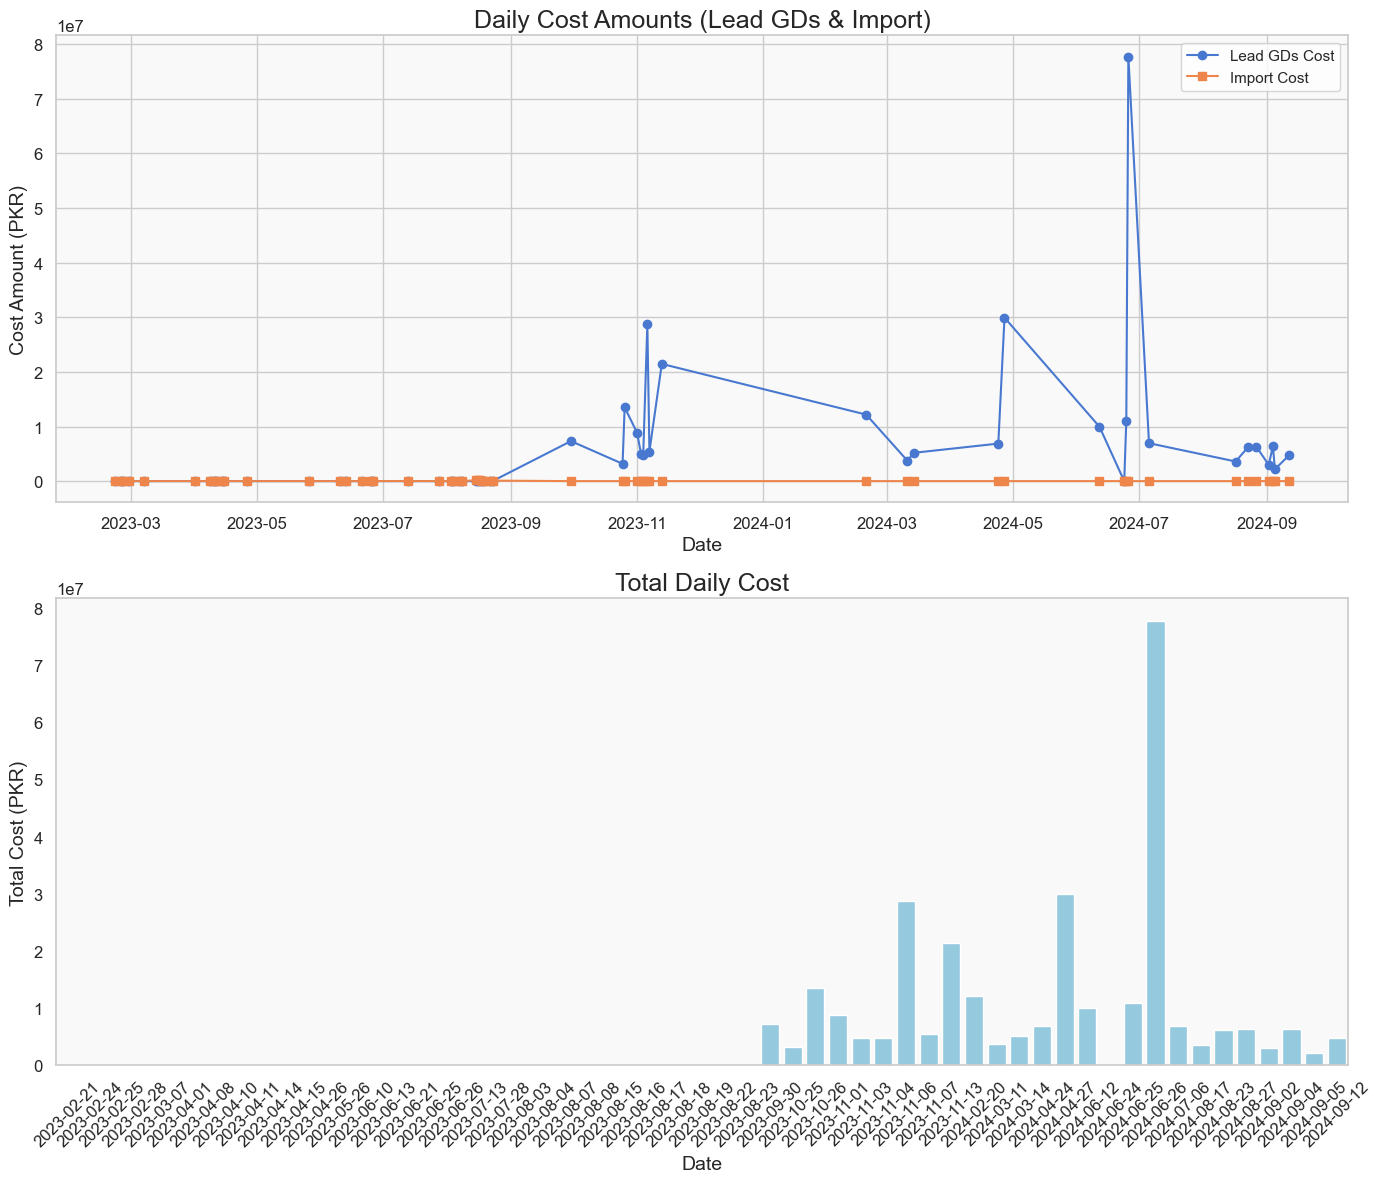

In [28]:
# Step 1: Load the merged data
merged = pd.read_excel("Merged_Daily_Cost.xlsx")

# Step 2: Basic formatting
merged['Cost_Date'] = pd.to_datetime(merged['Cost_Date'])

# Step 3: Set plot style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 7)
plt.rcParams['axes.titlesize'] = 18
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Step 4: Create figure with subplots
fig, axs = plt.subplots(2, 1, figsize=(14, 12))
palette = sns.color_palette("muted")

# --- Plot 1: Daily Cost Amounts (Line Plot) ---
axs[0].plot(merged['Cost_Date'], merged['Cost_Amount_Lead'], label="Lead GDs Cost", color=palette[0], marker='o')
axs[0].plot(merged['Cost_Date'], merged['Cost_Amount_Import'], label="Import Cost", color=palette[1], marker='s')
axs[0].set_title("Daily Cost Amounts (Lead GDs & Import)")
axs[0].set_xlabel("Date")
axs[0].set_ylabel("Cost Amount (PKR)")
axs[0].legend()
axs[0].grid(True)
axs[0].set_facecolor("#f9f9f9")

# --- Plot 2: Total Cost (Bar Plot) ---
sns.barplot(
    x='Cost_Date',
    y='Total_Cost_Amount',
    data=merged,
    color="skyblue",   # ✅ Use a single color instead of palette
    ax=axs[1]
)
axs[1].set_title("Total Daily Cost")
axs[1].set_xlabel("Date")
axs[1].set_ylabel("Total Cost (PKR)")
axs[1].tick_params(axis='x', rotation=45)
axs[1].grid(axis='y')
axs[1].set_facecolor("#f9f9f9")

# Adjust layout
plt.tight_layout()

# Step 5: Save the figure
plt.savefig("Daily_Cost_Plots.png", dpi=300)
print("✅ Plot saved as 'Daily_Cost_Plots.png'.")

# Step 6: Show the plots
plt.show()

## 3rd KPI Gross_Profit.xlsx Creation

In [29]:
import pandas as pd

### === 1. Load Lead GDs (Cost and Sale amounts) ===

lead_file = "Lead GDs.xlsx"
lead_gds_df = pd.read_excel(lead_file, sheet_name="Lead GDs", header=2)

# Clean and rename columns
lead_gds_df = lead_gds_df.rename(columns={
    "Date of IGM": "Cost_Date",
    "Net \nImport Weight": "Quantity",
    "Rate Ton": "Rate_Ton",
    "Gross \nImport Weight": "Gross_Weight",
    "Import Amount": "Cost_Amount",
    "Sale Rate in USD": "Sale_Rate_USD",
    "Sale": "Sale_Amount"
})

# Select important columns
lead_gds_cleaned = lead_gds_df[
    ["Cost_Date", "Quantity", "Rate_Ton", "Gross_Weight", "Cost_Amount", "Sale_Rate_USD", "Sale_Amount"]
].copy()

# Clean datatypes
lead_gds_cleaned["Cost_Date"] = pd.to_datetime(lead_gds_cleaned["Cost_Date"], errors="coerce")
lead_gds_cleaned["Quantity"] = pd.to_numeric(lead_gds_cleaned["Quantity"], errors="coerce")
lead_gds_cleaned["Rate_Ton"] = pd.to_numeric(lead_gds_cleaned["Rate_Ton"], errors="coerce")
lead_gds_cleaned["Gross_Weight"] = pd.to_numeric(lead_gds_cleaned["Gross_Weight"], errors="coerce")
lead_gds_cleaned["Cost_Amount"] = pd.to_numeric(lead_gds_cleaned["Cost_Amount"], errors="coerce")
lead_gds_cleaned["Sale_Rate_USD"] = pd.to_numeric(lead_gds_cleaned["Sale_Rate_USD"], errors="coerce")
lead_gds_cleaned["Sale_Amount"] = pd.to_numeric(lead_gds_cleaned["Sale_Amount"], errors="coerce")

### === 2. Load Onyx Import Costs ===

imp = pd.read_excel("Onyx.xlsx", sheet_name="Import", header=1)
imp.columns = (imp.columns.str.strip()
                      .str.replace("\n"," ")
                      .str.replace("  "," "))

# Parse date
imp["Cost_Date"] = pd.to_datetime(imp["Receiving Date"], errors="coerce")

# Pick cost columns
cost_cols = [
    "Ali Nawaz Charban Costs",
    "Chaman Clearing Costs - Qasim",
    "Pakistan Unloading Cost",
    "Weight Slip Expenses",
    "Route Expenses",
]

# Only keep columns that actually exist
cost_cols = [c for c in cost_cols if c in imp.columns]

# Sum up costs
imp[cost_cols] = imp[cost_cols].apply(pd.to_numeric, errors="coerce").fillna(0)
imp["Onyx_Cost"] = imp[cost_cols].sum(axis=1)

# Aggregate by day
daily_onyx_cost = (
    imp.groupby("Cost_Date", as_index=False)["Onyx_Cost"]
       .sum()
       .sort_values("Cost_Date")
)

### === 3. Merge Everything ===

# Merge Lead GDs + Onyx costs
merged = pd.merge(
    lead_gds_cleaned,
    daily_onyx_cost,
    on="Cost_Date",
    how="outer"
)

# Fill missing with zeros
merged = merged.fillna(0)

# Calculate Total Cost
merged["Total_Cost"] = merged["Cost_Amount"] + merged["Onyx_Cost"]

# Calculate Gross Profit
merged["Gross_Profit"] = merged["Sale_Amount"] - merged["Total_Cost"]

# Safer Margin % calculation
merged["Margin %"] = merged.apply(
    lambda row: (row["Gross_Profit"] / row["Sale_Amount"] * 100) if row["Sale_Amount"] != 0 else 0,
    axis=1
)

# Optional: remove blank rows (zero cost and sale)
merged = merged[~((merged["Cost_Amount"] == 0) & (merged["Sale_Amount"] == 0) & (merged["Onyx_Cost"] == 0))]

### === 4. Save to Excel ===

merged.to_excel("gross_profit.xlsx", index=False)

print("✅ gross_profit.xlsx created successfully!")
merged

✅ gross_profit.xlsx created successfully!


,Cost_Date,Quantity,Rate_Ton,Gross_Weight,Cost_Amount,Sale_Rate_USD,Sale_Amount,Onyx_Cost,Total_Cost,Gross_Profit,Margin %
0,0,8963.23,62946.974003,9173.23,547712861.0,0.0,0.0,0.0,547712861.0,-547712861.0,0.000000
1,0,0.00,0.000000,0.00,0.0,0.0,5826099.5,0.0,0.0,5826099.5,100.000000
2,0,88.24,56931.776972,88.24,5023660.0,650.0,57356.0,0.0,5023660.0,-4966304.0,-8658.734919
9,0,217.04,56911.380391,217.04,12352046.0,650.0,141076.0,0.0,12352046.0,-12210970.0,-8655.596983
10,0,309.77,56941.982761,309.77,17638918.0,650.0,201350.5,0.0,17638918.0,-17437567.5,-8660.305040
...,...,...,...,...,...,...,...,...,...,...,...
82,2024-08-27 00:00:00,110.68,56901.174557,110.68,6297822.0,650.0,71942.0,0.0,6297822.0,-6225880.0,-8654.026855
83,2024-09-02 00:00:00,52.18,56941.989268,52.18,2971233.0,650.0,33917.0,0.0,2971233.0,-2937316.0,-8660.306041
84,2024-09-04 00:00:00,112.38,56931.785015,112.38,6397994.0,650.0,73047.0,0.0,6397994.0,-6324947.0,-8658.736156
85,2024-09-05 00:00:00,38.30,56941.984334,38.30,2180878.0,650.0,24895.0,0.0,2180878.0,-2155983.0,-8660.305282


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_17276\3108009592.py:69: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  plt.tight_layout(rect=[0, 0, 1, 0.96])  # Leave space for suptitle
C:\Users\LENOVO\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


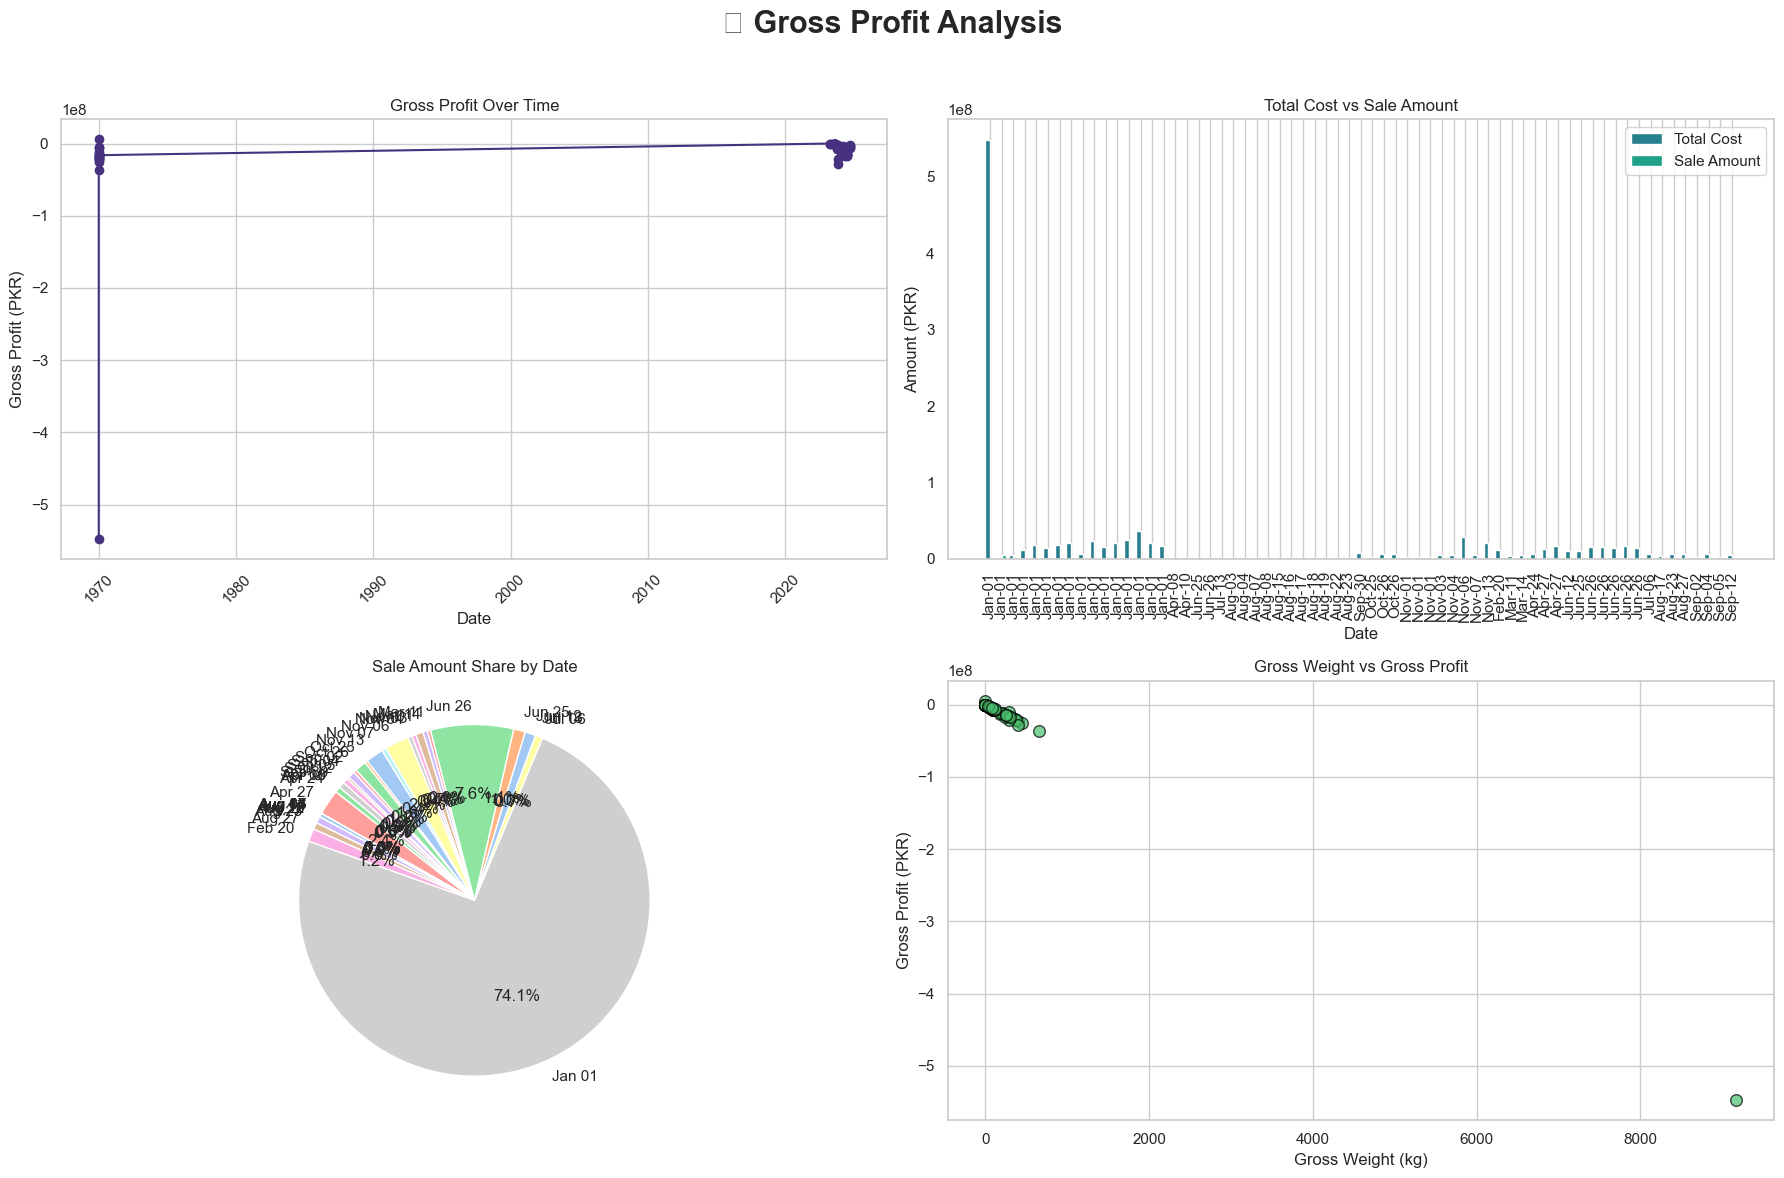

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_excel("gross_profit.xlsx")

# 💥 Fix Cost_Date (main reason of your error)
df['Cost_Date'] = pd.to_datetime(df['Cost_Date'], errors='coerce')

# Drop rows with missing dates (optional, if you want clean plots)
df = df.dropna(subset=['Cost_Date'])

# Fix styles
sns.set_theme(style="whitegrid")
palette = sns.color_palette("viridis", as_cmap=False)

# Create a 2x2 subplot layout
fig, axs = plt.subplots(2, 2, figsize=(18, 12))
fig.suptitle('📊 Gross Profit Analysis', fontsize=22, fontweight='bold')

# 1. Line Plot - Gross Profit over Time
axs[0, 0].plot(df['Cost_Date'], df['Gross_Profit'], marker='o', color=palette[0])
axs[0, 0].set_title("Gross Profit Over Time")
axs[0, 0].set_xlabel("Date")
axs[0, 0].set_ylabel("Gross Profit (PKR)")
axs[0, 0].tick_params(axis='x', rotation=45)
axs[0, 0].grid(True)

# 2. Bar Plot - Total Cost vs Sale Amount
width = 0.4
x = range(len(df))
axs[0, 1].bar(x, df['Total_Cost'], width=width, label='Total Cost', color=palette[2])
axs[0, 1].bar([i + width for i in x], df['Sale_Amount'], width=width, label='Sale Amount', color=palette[3])
axs[0, 1].set_xticks([i + width/2 for i in x])
axs[0, 1].set_xticklabels(df['Cost_Date'].dt.strftime('%b-%d'), rotation=90)
axs[0, 1].set_title("Total Cost vs Sale Amount")
axs[0, 1].set_xlabel("Date")
axs[0, 1].set_ylabel("Amount (PKR)")
axs[0, 1].legend()
axs[0, 1].grid(axis='y')

# 3. Pie Chart - Share of Total Sale Amount
total_sale_by_date = df.groupby(df['Cost_Date'].dt.strftime('%b %d'))['Sale_Amount'].sum()
axs[1, 0].pie(
    total_sale_by_date,
    labels=total_sale_by_date.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=sns.color_palette('pastel')
)
axs[1, 0].set_title("Sale Amount Share by Date")

# 4. Scatter Plot - Gross Weight vs Gross Profit
scatter = axs[1, 1].scatter(
    df['Gross_Weight'],
    df['Gross_Profit'],
    color=palette[4],
    edgecolors='black',
    alpha=0.7,
    s=70
)
axs[1, 1].set_title("Gross Weight vs Gross Profit")
axs[1, 1].set_xlabel("Gross Weight (kg)")
axs[1, 1].set_ylabel("Gross Profit (PKR)")
axs[1, 1].grid(True)

# Layout
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Leave space for suptitle
plt.show()